<a href="https://colab.research.google.com/github/sanuj/tf-basics/blob/master/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Download dataset and unzip.
!wget https://github.com/sanuj/tf-basics/raw/master/data/cats-dogs-small.zip
!unzip cats-dogs-small.zip


In [0]:
import os

base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 16s 159ms/step - loss: 0.6895 - acc: 0.5295 - val_loss: 0.6914 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 11s 115ms/step - loss: 0.6588 - acc: 0.6135 - val_loss: 0.6495 - val_acc: 0.6110
Epoch 3/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6123 - acc: 0.6725 - val_loss: 0.6048 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5655 - acc: 0.7135 - val_loss: 0.5895 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5338 - acc: 0.7320 - val_loss: 0.5845 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5050 - acc: 0.7575 - val_loss: 0.5637 - va

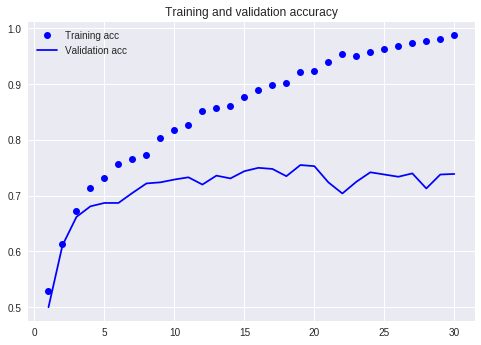

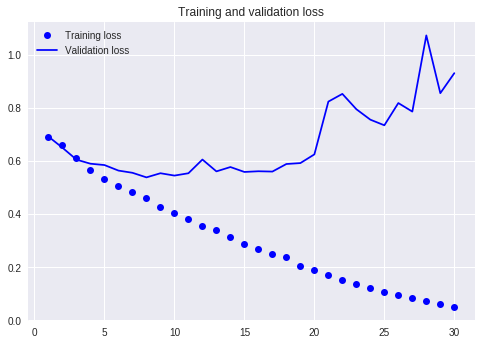

In [2]:
# Instantiating a small convnet for dogs vs. cats classification
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Configuring the model for training
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

# Fitting the model using a batch generator
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=validation_generator, validation_steps=50)

# Saving the model
model.save('cats_and_dogs_small_1.h5')

# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

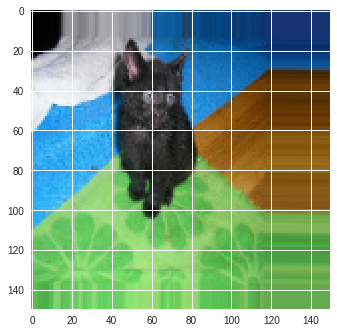

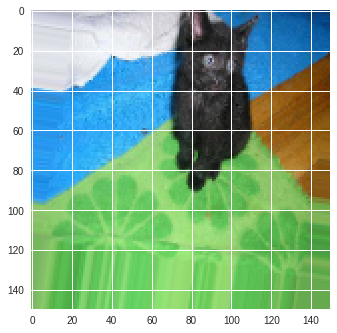

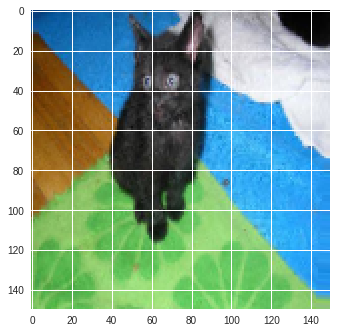

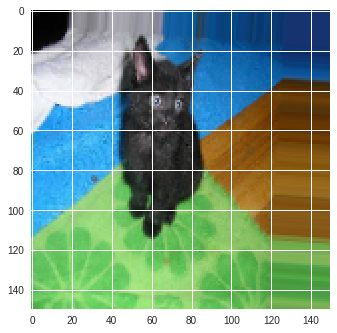

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 36s 362ms/step - loss: 0.6928 - acc: 0.5203 - val_loss: 0.6797 - val_acc: 0.5882
Epoch 2/100
100/100 [==============================] - 33s 328ms/step - loss: 0.6797 - acc: 0.5725 - val_loss: 0.6601 - val_acc: 0.5896
Epoch 3/100
100/100 [==============================] - 33s 326ms/step - loss: 0.6699 - acc: 0.5941 - val_loss: 0.6476 - val_acc: 0.6218
Epoch 4/100
100/100 [==============================] - 32s 323ms/step - loss: 0.6546 - acc: 0.6122 - val_loss: 0.6306 - val_acc: 0.6534
Epoch 5/100
100/100 [==============================] - 33s 329ms/step - loss: 0.6368 - acc: 0.6409 - val_loss: 0.6175 - val_acc: 0.6643
Epoch 6/100
100/100 [==============================] - 33s 328ms/step - loss: 0.6246 - acc: 0.6519 - val_loss: 0.5999 - v

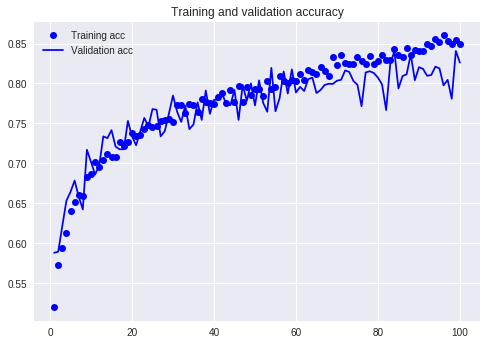

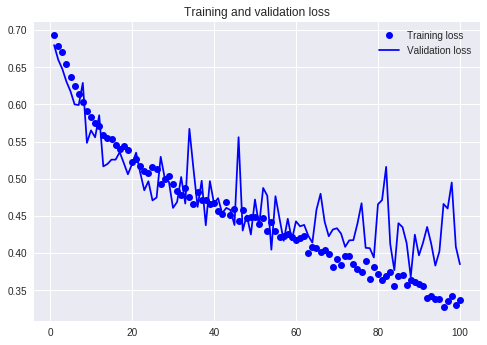

In [5]:
# USING DATA AUGMENTATION
# Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# Displaying some randomly augmented training images
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
              
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()


# Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=32, class_mode='binary')
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

# saving the model
model.save('cats_and_dogs_small_2.h5')

# Plotting results again
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8170000040531158
